Hello evrybody! I would like to share with you my project which was fullfiled based on data set from kaggle.com, "Customemer Personality Analysis"

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
Data Set Overview:
Atributes of dataset can be union in 4 big group. 

People
ID: Customer's unique identifier.
Year_Birth: Customer's birth year.
Education: Customer's education level.
Marital_Status: Customer's marital status.
Income: Customer's yearly household income.
Kidhome: Number of children in customer's household.
Teenhome: Number of teenagers in customer's household.
Dt_Customer: Date of customer's enrollment with the company.
Recency: Number of days since customer's last purchase.
Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products
MntWines: Amount spent on wine in last 2 years.
MntFruits: Amount spent on fruits in last 2 years.
MntMeatProducts: Amount spent on meat in last 2 years.
MntFishProducts: Amount spent on fish in last 2 years.
MntSweetProducts: Amount spent on sweets in last 2 years.
MntGoldProds: Amount spent on gold in last 2 years.

Promotion 
NumDealsPurchases: Number of purchases made with a discount.
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise.

Place  
NumWebPurchases: Number of purchases made through the company’s web site.
NumCatalogPurchases: Number of purchases made using a catalogue.
NumStorePurchases: Number of purchases made directly in stores.
NumWebVisitsMonth: Number of visits to company’s web site in the last month.



Let's turn on the nesassry libaries for following work

In [7049]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pip
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pd.options.plotting.backend='plotly' 
from scipy import stats as st
import jinja2 as j



Looking at the dataset, main dimention and type of data. I took dataset from site(link). Below I am going look through dataset, check quality of data and clean it where it applicable. I will asses columns by columns and take a deccition what should be done to improve data quality for  following analyses   

In [7050]:

df = pd.read_csv("marketing_campaign.csv", sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7051]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7052]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7053]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7054]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
df.head(12)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,0,0,20,1,0,0,0,0,0,0


In [7055]:
df['Income']=df['Income'].fillna(df['Income'].median())

In [7056]:
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [7057]:

df["Income"] = df['Income'].astype(int)

In [7058]:
for col in df.columns:
    num = df[col].nunique()
    print(f"{col} >> Unique Value:{num}")
    print(df[col].value_counts())
    print("*************************************************")

ID >> Unique Value:2240
ID
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: count, Length: 2240, dtype: int64
*************************************************
Year_Birth >> Unique Value:59
Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64
*************************************************
Educati

In [7059]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7060]:
df.columns = df.columns.str.lower()
plt.figure(figsize=(18,12))
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


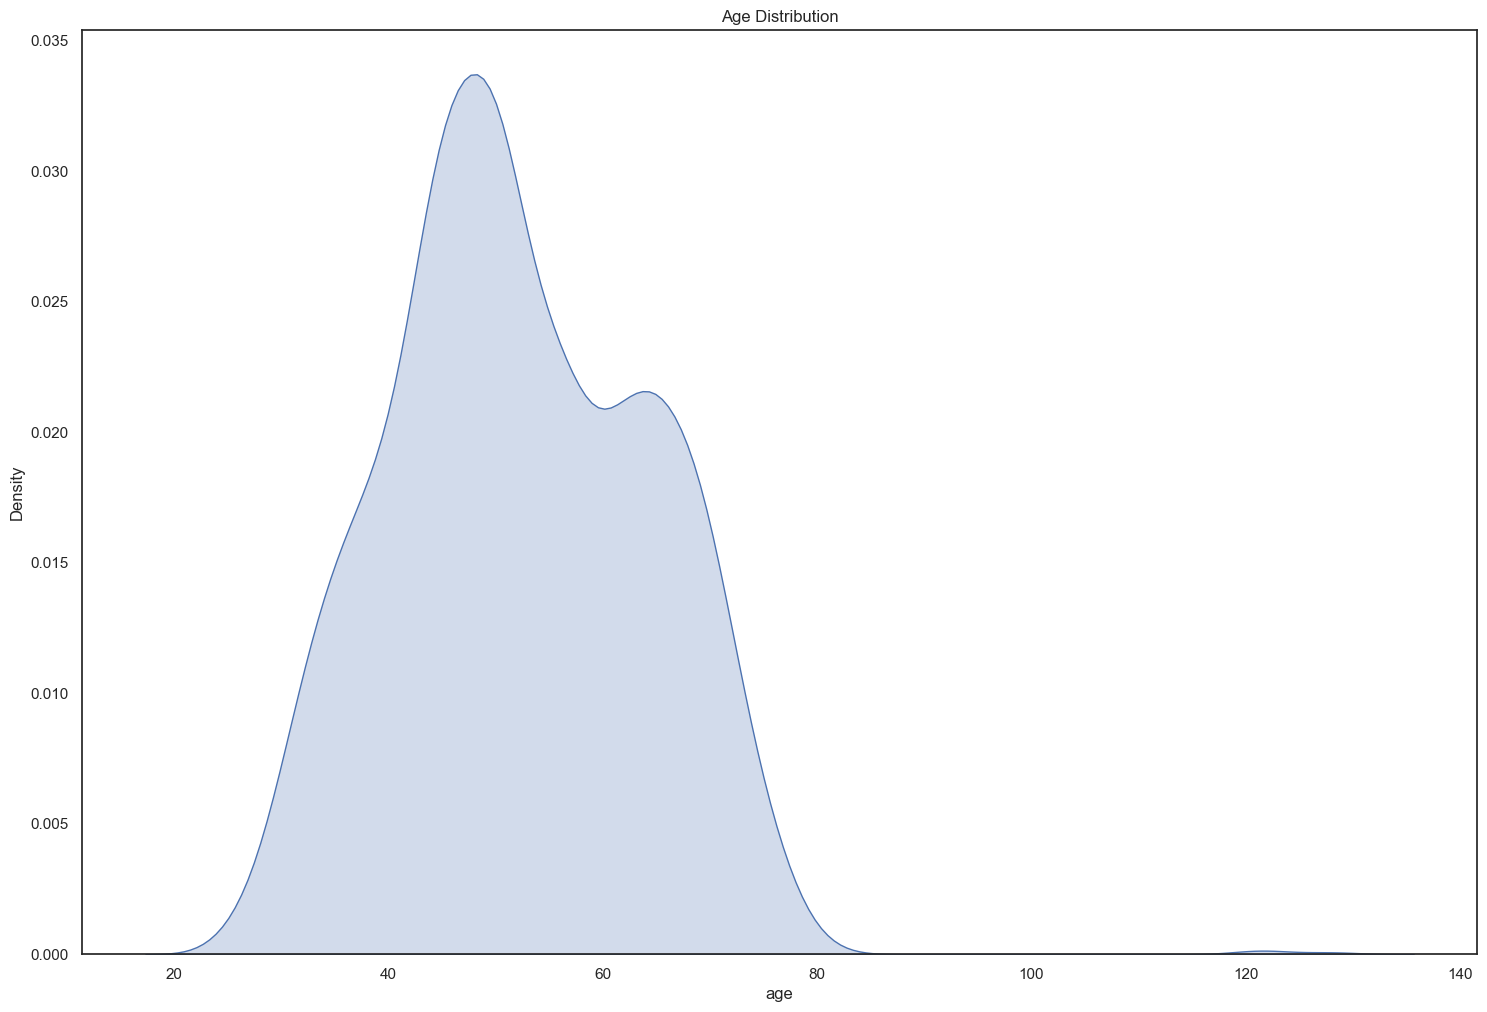

count    2240.000000
mean       52.194196
std        11.984069
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: age, dtype: float64

In [7061]:
df['age'] = 2021- df['year_birth']
df
ax = plt.axes()
sn.kdeplot(
    data=df,
    x="age",
    fill=True,
    ax=ax,
)
ax.set_title("Age Distribution")
plt.show()
df['age'].describe()

In [7062]:
df=df[df.age!=128]
df=df[df.age!=122]
df=df[df.age!=121]
print('Unique value:', '\n', df['age'].value_counts()) 
df["age"].hist(bins=15)
df['age'].describe()

Unique value: 
 age
45    89
50    87
46    83
49    79
43    77
51    77
56    74
48    74
52    71
47    69
65    55
63    53
42    53
69    52
44    52
53    51
62    51
55    50
67    50
66    49
61    49
39    45
58    45
54    44
59    44
64    43
70    43
38    42
35    42
57    42
41    39
40    39
37    38
60    36
68    35
36    32
32    30
72    30
71    29
33    29
34    27
73    21
31    18
75    16
74    16
30    15
29    13
76     8
78     7
77     7
28     5
26     5
27     3
25     2
80     1
81     1
Name: count, dtype: int64


count    2237.000000
mean       52.098346
std        11.701917
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max        81.000000
Name: age, dtype: float64

In [7063]:
df['income'].describe()

count      2237.000000
mean      52227.402325
std       25043.267011
min        1730.000000
25%       35523.000000
50%       51381.000000
75%       68281.000000
max      666666.000000
Name: income, dtype: float64

In [7064]:
df["income"].hist(bins=15)

In [7065]:
df=df[df.income!=666666]
df["income"].hist(bins=15)

In [7066]:
df['income'].describe()

count      2236.000000
mean      51952.608676
std       21411.466994
min        1730.000000
25%       35502.500000
50%       51381.000000
75%       68275.750000
max      162397.000000
Name: income, dtype: float64

In [7067]:
df['recency'].describe()
print('Minimum value:',df['recency'].min(),
      'Maximum value:', df['recency'].max(),
      'Mean value:', df['recency'].mean(),
      'Median value:', df['recency'].median(),
      'Mode value:', df['recency'].mode()[0])


Minimum value: 0 Maximum value: 99 Mean value: 49.116279069767444 Median value: 49.0 Mode value: 56


In [7068]:
df['marital_status'].value_counts() 

marital_status
Married     864
Together    578
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [7069]:
df["living_with_status"] = df["marital_status"].replace(
    {
        "Married": "partner",
        "Together": "partner",
        "Absurd": "alone",
        "Widow": "alone",
        "YOLO": "alone",
        "Divorced": "alone",
        "Single": "alone",
        "Alone": "alone",
    }
)

In [7070]:
status_counts = df['living_with_status'].value_counts() 
status_number_share = ((status_counts / status_counts.sum()) * 100).round(2) 
 
df_status = pd.DataFrame({"living_with_status": status_number_share.index, 'share': status_number_share.values}) 
 
fig = px.pie(df_status, names='living_with_status', values='share', 
             labels={'living_with_status':'living_with_status', 'share': 'Share(%)'}, 
             title='Share of customer by family statuses ', 
             color='living_with_status', color_discrete_map={'partner': '#B6D3F1', 'Alone': '#B7ADE9'}) 
 
fig.update_layout(plot_bgcolor='white') 
 
fig

In [7071]:
df['kids_number'] =df['kidhome']+df['teenhome']
df['kids_number'].unique()

a = df['kids_number'].value_counts()
b = df['kids_number'].sum()
print(a)
print(b)


kids_number
1    1125
0     637
2     421
3      53
Name: count, dtype: int64
2126


In [7072]:
kid_counts = df['kids_number'].value_counts() 
kid_number_share = ((kid_counts / kid_counts.sum()) * 100).round(2) 
 
df_kid = pd.DataFrame({"kids_number": kid_number_share.index, 'share': kid_number_share.values}) 
 
fig = px.pie(df_kid, names='kids_number', values='share', 
             labels={'kids_number':'kids_number', 'share': 'Share(%)'}, 
             title='Share of children by quantity', 
             color='kids_number', color_discrete_map={'0 ': '#B6D3F1', '1': '#B7ADE9'}) 
 
fig.update_layout(plot_bgcolor='white') 
 
fig

In [7073]:
df['education'].value_counts()

education
Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64

In [7074]:
df["education"] = df["education"].replace(
    {
        "Basic": "Undergraduate",
        "2n Cycle": "Undergraduate",
        "Graduation": "Graduate",
        "Master": "Postgraduate",
        "PhD": "Postgraduate",
    }
)
df['education'].value_counts()

education
Graduate         1126
Postgraduate      855
Undergraduate     255
Name: count, dtype: int64

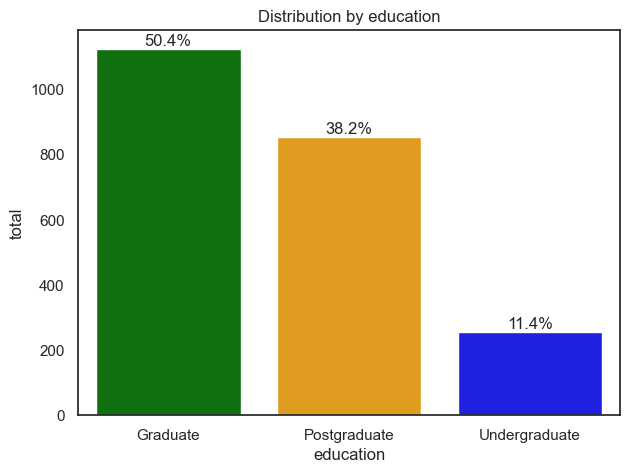

In [7075]:
education_unique = df["education"].unique()
education_counts = df['education'].value_counts() 
sorted_data = education_counts.reindex(education_unique)
total = sum(education_counts)

education_number_share = [count / total * 100 for count in education_counts]

plt.figure(figsize=(7, 5))
bars = sn.barplot(x = sorted_data.index, y = sorted_data,hue=sorted_data.index, palette=["green", "orange", "blue", "red"], dodge=False)

plt.xlabel("education")
plt.ylabel("total")
plt.title("Distribution by education")

for bar, percentage in zip(bars.patches, education_number_share):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.1f}%", ha="center", va="bottom")
    
plt.show()


In [7076]:
df = df.rename(
    columns={
        "mntwines": "wines",
        "mntfruits": "fruits",
        "mntmeatproducts": "meat",
        "mntfishproducts": "fish",
        "mntsweetproducts": "sweets",
        "mntgoldprods": "gold",
    }
)


In [7077]:
# график типы затрат по категориям

In [7078]:
df['total_cat_spent'] = df['wines'] + df['fruits'] + df['meat'] + df['gold']+df['fish']+df['sweets']
df['total_cat_spent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: total_cat_spent, Length: 2236, dtype: int64

In [7079]:
df.pivot_table(index=['living_with_status'], values=['wines','fruits','meat','gold'], aggfunc="sum",fill_value=0) 


,fruits,gold,meat,wines
living_with_status,,,,
alone,21973,36646,137626,244083
partner,36780,61700,235749,435946


In [7080]:
new_table = df[['total_cat_spent','age']] 
new_table
df['total_cat_spent'].describe()

count    2236.000000
mean      605.986583
std       601.865156
min         5.000000
25%        69.000000
50%       396.500000
75%      1045.500000
max      2525.000000
Name: total_cat_spent, dtype: float64

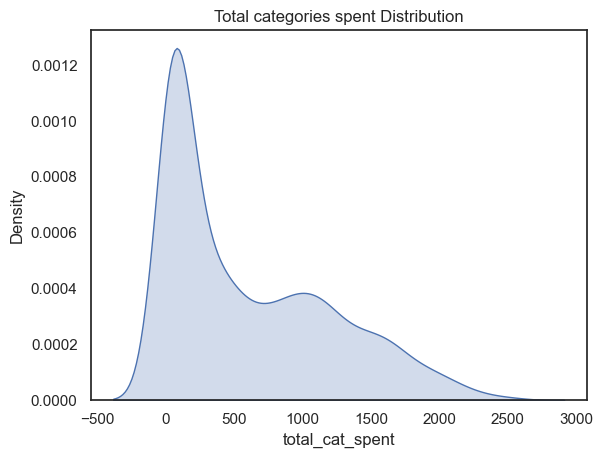

In [7081]:
ax = plt.axes()
sn.kdeplot(
    data=df,
    x="total_cat_spent",
    fill=True,
    ax=ax,
)
ax.set_title("Total categories spent Distribution")
plt.show()
# переделать график
# plotly

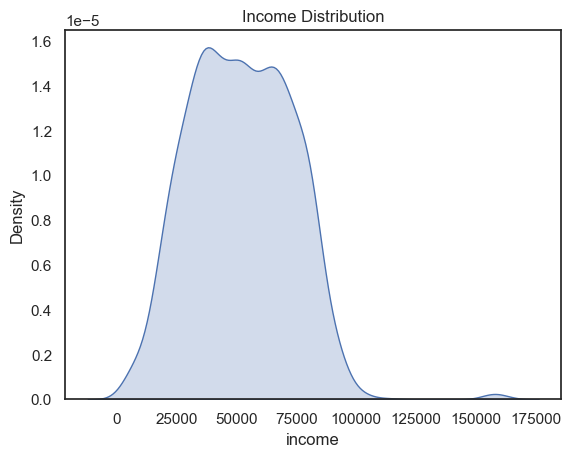

In [7082]:
ax = plt.axes()
sn.kdeplot(
    data=df,
    x="income",
    fill=True,
    ax=ax,
)
ax.set_title("Income Distribution")
plt.show()

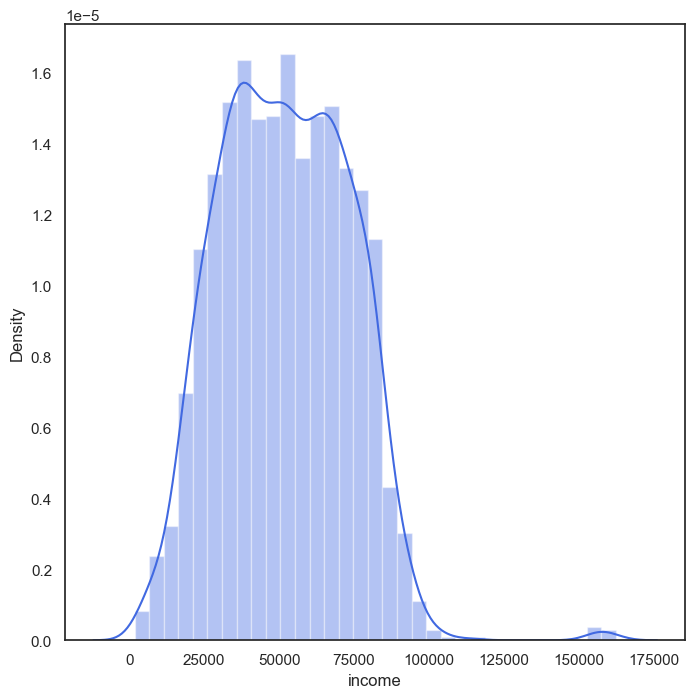

In [7083]:
plt.figure(figsize=(8,8))
sn.distplot(df["income"],color = 'royalblue')
plt.show()


In [7084]:
def income_category(row):
    if row['income'] <= 30000:
        return 'low income'
    elif (row['income'] <= 80000) and (row['income'] > 30000):
        return 'medium income'
    else:
        return 'high'

#применяем метод apply и функцию floors_category к созданному столбцу floor_group:
df['income_category'] = df.apply(income_category, axis=1)  

df.pivot_table(index=['income_category'], values=['income','total_cat_spent'], aggfunc="sum",fill_value=0) 
sn.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Expenses impact versus level of Income ",fontsize=24)
sn.barplot(x="income_category", y="total_cat_spent", data=df,palette="rainbow")



<Axes: title={'center': 'Expenses impact versus level of Income '}, xlabel='income_category', ylabel='total_cat_spent'>

What is dependacy  customer expensess versus their income? 
Below you can fond answer that customers earned more spent higher than other 2 group with medium and low income. Otherhand we see  that share of group with medium income in our dataset at the first place 73,8% then group with low income 16,5% and last with high income i=only 9,6%

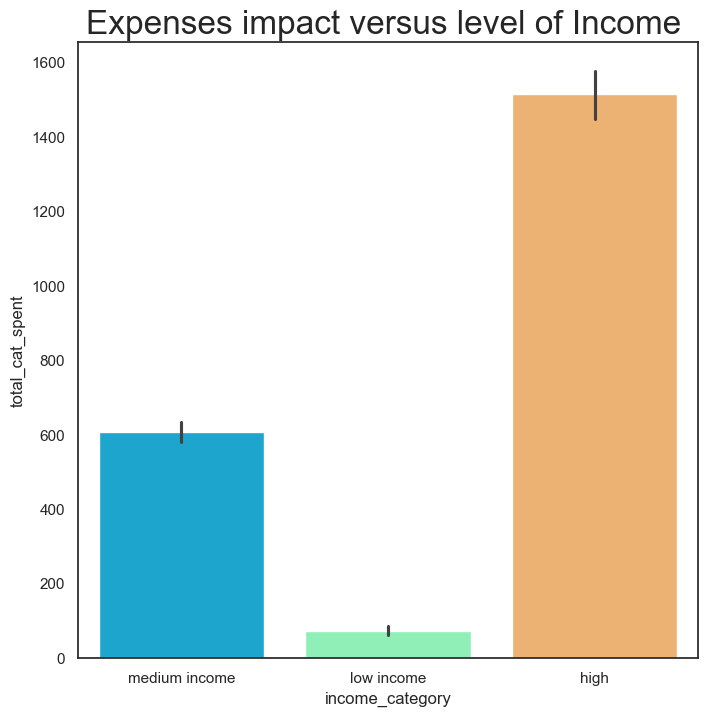

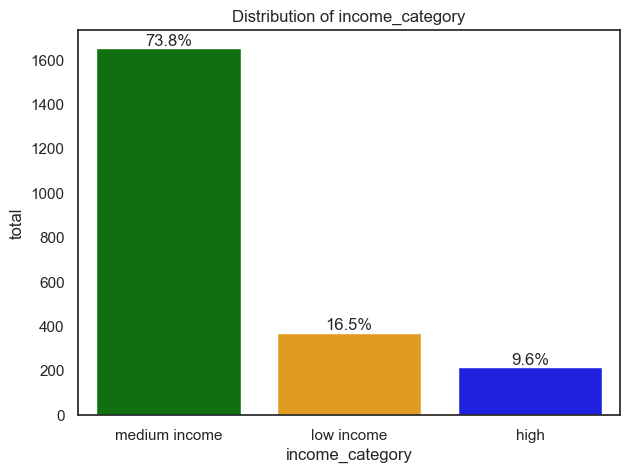

In [7085]:
income_category_unique = df["income_category"].unique()
income_category_counts = df['income_category'].value_counts() 
sorted_data = income_category_counts.reindex(income_category_unique )
total = sum(income_category_counts)
income_category_share = [count / total * 100 for count in income_category_counts]

plt.figure(figsize=(7, 5))
bars = sn.barplot(x = sorted_data.index, y = sorted_data,hue=sorted_data.index, palette=["green", "orange", "blue"], dodge=False)

plt.xlabel("income_category")
plt.ylabel("total")
plt.title("Distribution of income_category")

for bar, percentage in zip(bars.patches, income_category_share):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.1f}%", ha="center", va="bottom")
    
plt.show()

In [7086]:
df['average_spent'] = df.groupby('age')['total_cat_spent'].transform('mean')
new_table_1 = df[['total_cat_spent','age','average_spent']] 
new_table_1


,total_cat_spent,age,average_spent
0,1617,64,637.720930
1,27,67,756.540000
2,776,56,605.202703
3,53,37,390.052632
4,422,40,459.692308
...,...,...,...
2235,1341,54,602.545455
2236,444,75,806.000000
2237,1241,40,459.692308
2238,843,65,688.509091


In [7087]:
df.pivot_table(index=['living_with_status'], values=['total_cat_spent','income'], aggfunc="sum",fill_value=0) 

,income,total_cat_spent
living_with_status,,
alone,41358899,493583
partner,74807134,861403


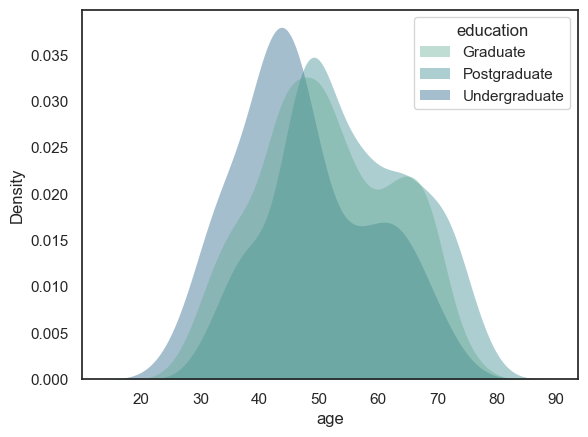

In [7088]:
sn.kdeplot(
   data=df, x='age', hue="education",
   fill=True, common_norm=False, palette="crest",
   alpha=.4, linewidth=0,
)
plt.show()


In [7089]:
df=df.rename(columns={"numwebpurchases": "web","numcatalogpurchases":"catalog","numstorepurchases":"store","numdealspurchases":"deals"})
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'wines', 'fruits', 'meat', 'fish',
       'sweets', 'gold', 'deals', 'web', 'catalog', 'store',
       'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5',
       'acceptedcmp1', 'acceptedcmp2', 'complain', 'response', 'age',
       'living_with_status', 'kids_number', 'total_cat_spent',
       'income_category', 'average_spent'],
      dtype='object')

In [7090]:
df['rtm'] = df['web']+df['catalog']+df['store']+df['deals']
df['rtm'].describe()


count    2236.000000
mean       14.872540
std         7.677874
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: rtm, dtype: float64

In [7091]:
df['dt_customer'] = pd.to_datetime(df['dt_customer'],format="%d-%m-%Y")
print(df['dt_customer'])

df['Year'] = df['dt_customer'].dt.year

print(df['Year'])

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: dt_customer, Length: 2236, dtype: datetime64[ns]
0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Year, Length: 2236, dtype: int32


In [7092]:
pd.crosstab(df['kids_number'],df['education'],margins=True).style.background_gradient(cmap='Blues')


education,Graduate,Postgraduate,Undergraduate,All
kids_number,,,,
0,321,235,81,637
1,578,413,134,1125
2,202,182,37,421
3,25,25,3,53
All,1126,855,255,2236


In [7093]:
pd.crosstab(df['kids_number'],df['living_with_status'],margins=True).style.background_gradient(cmap='Blues')

living_with_status,alone,partner,All
kids_number,,,
0,254,383,637
1,378,747,1125
2,141,280,421
3,21,32,53
All,794,1442,2236


In [7094]:
pd.crosstab(df['living_with_status'],df['education'],margins=True).style.background_gradient(cmap='Blues')

education,Graduate,Postgraduate,Undergraduate,All
living_with_status,,,,
alone,408,303,83,794
partner,718,552,172,1442
All,1126,855,255,2236


In [7095]:
pd.crosstab(df['living_with_status'],df['average_spent'],margins=True).style.background_gradient(cmap='Blues')

average_spent,69.000000,157.000000,364.343750,390.052632,414.137931,422.432432,445.337662,455.840580,459.692308,466.166667,468.098039,498.150943,503.833333,507.303371,508.149425,512.461538,523.500000,532.000000,537.843137,560.760000,569.377778,576.848101,578.927711,602.545455,605.202703,608.000000,617.185185,633.500000,637.720930,644.380282,665.395349,685.538462,686.568627,688.509091,692.285714,698.095238,699.551020,720.068966,724.433962,728.457143,756.540000,758.511111,760.972222,761.200000,780.863636,806.000000,861.966667,864.380952,1006.625000,1027.142857,1073.062500,1112.333333,1186.428571,1191.200000,1457.333333,2119.000000,All
living_with_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
alone,0,1,13,12,10,24,22,18,12,13,22,19,10,29,32,12,13,7,14,21,23,22,31,17,23,15,16,24,13,19,16,6,16,17,34,17,17,12,22,11,19,11,12,5,21,3,12,6,3,3,4,9,5,5,1,0,794
partner,2,0,19,26,19,50,55,51,27,17,29,34,32,60,55,27,29,11,37,29,22,57,52,27,51,34,11,28,30,52,27,7,35,38,43,25,32,17,31,24,31,34,24,0,23,13,18,15,5,4,12,6,2,0,2,1,1442
All,2,1,32,38,29,74,77,69,39,30,51,53,42,89,87,39,42,18,51,50,45,79,83,44,74,49,27,52,43,71,43,13,51,55,77,42,49,29,53,35,50,45,36,5,44,16,30,21,8,7,16,15,7,5,3,1,2236


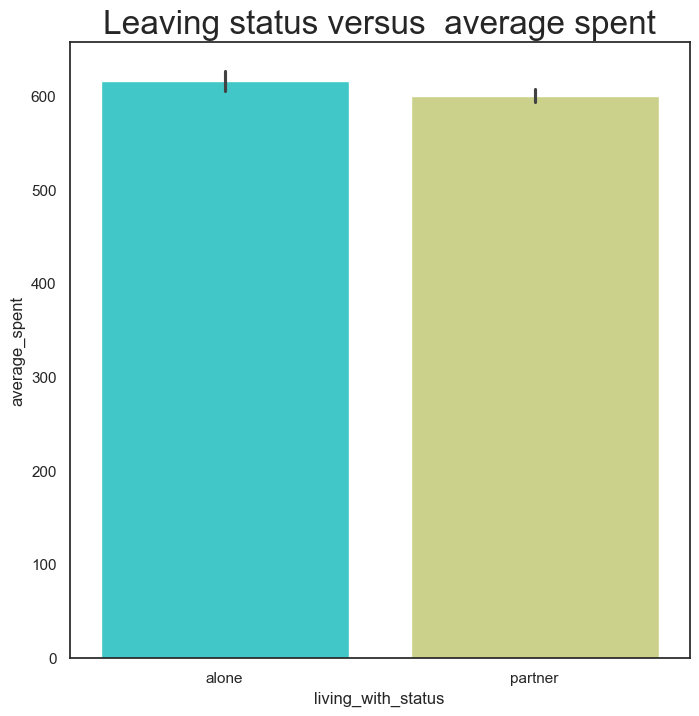

In [7096]:
sn.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Leaving status versus  average spent",fontsize=24)
sn.barplot(x="living_with_status", y="average_spent", data=df,palette="rainbow")
plt.show()


In [7097]:
pd.crosstab(df['education'],df['total_cat_spent'],margins=True).style.background_gradient(cmap='Blues')

Do single clients spend more than those living with a partner? Based on the graph below, we can see that we don't have much of a difference, but single customers spend more on average.

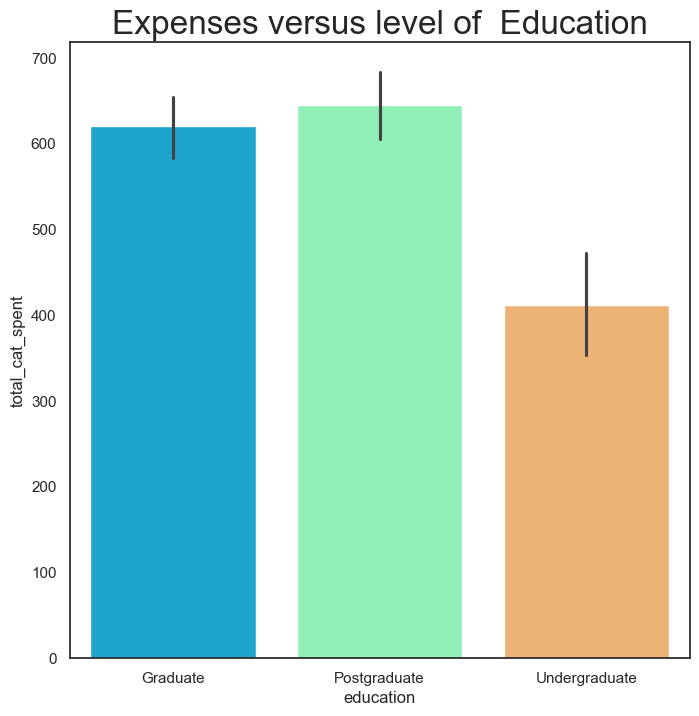

In [7098]:
sn.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Expenses versus level of  Education",fontsize=24)
sn.barplot(x="education", y="total_cat_spent", data=df,palette="rainbow")
plt.show()

Let's test the following hypothesis: does the amount of expenses depend on the level of education of customer? Answer: yes, we can observe this dependence. People with Graduate and postgraduate degrees spent more than undergraduate customers.

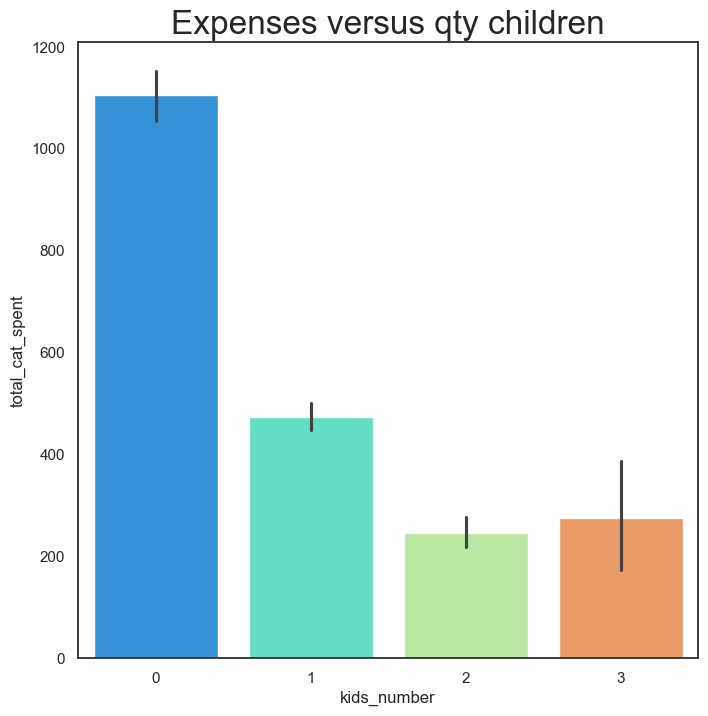

In [7099]:
sn.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Expenses versus qty children",fontsize=24)
sn.barplot(x="kids_number", y="total_cat_spent", data=df,palette="rainbow")
plt.show()

Let's test the following hypothesis. Do customers spend more if they have children or more than 1 child? We see that no, the client without children spent more than the client with children. But it’s also worth paying attention to the sample; in our data, the proportion of consumers without children is 28,5%

total_accep_comp
0    1774
1     324
2      83
3      44
4      11
Name: count, dtype: int64


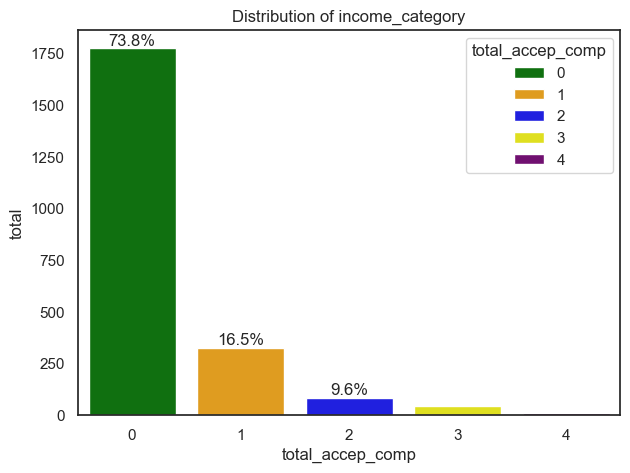

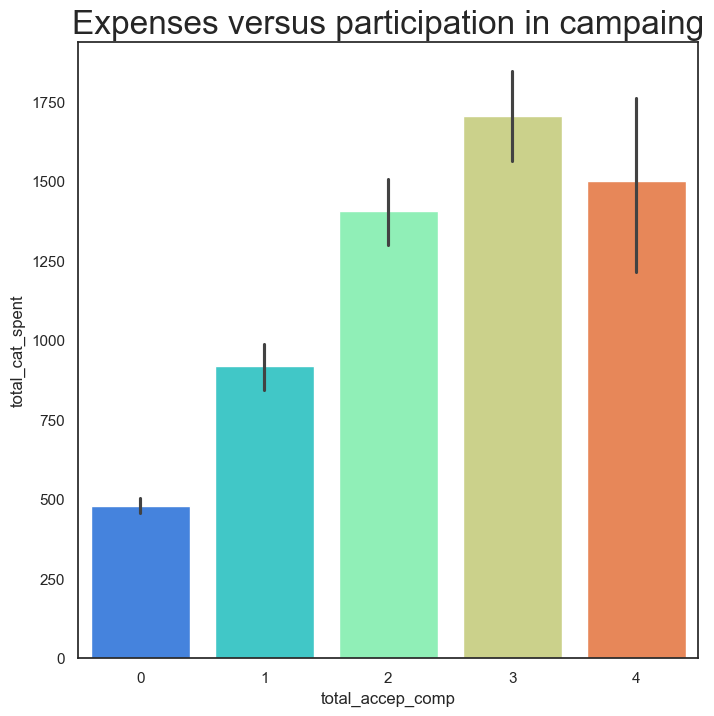

In [7100]:
df['total_accep_comp'] = df['acceptedcmp1'] + df['acceptedcmp2'] + df['acceptedcmp3'] + df['acceptedcmp4'] + df['acceptedcmp5']
# sum values by aceptance/participation in  Campains by customer

a = df['total_accep_comp'].value_counts()

print(a)

total_comp_category_unique = df["total_accep_comp"].unique()
total_comp_category_counts = df['total_accep_comp'].value_counts() 
sorted_data = total_comp_category_counts.reindex(total_comp_category_unique )
total = sum(total_comp_category_counts)
# percentages = [count / total * 100 for count in type_counts]
total_comp_category_share = [count / total * 100 for count in total_comp_category_counts]

plt.figure(figsize=(7, 5))
bars = sn.barplot(x = sorted_data.index, y = sorted_data,hue=sorted_data.index, palette=["green", "orange", "blue","yellow","purple"], dodge=False)

plt.xlabel("total_accep_comp")
plt.ylabel("total")
plt.title("Distribution of income_category")

for bar, percentage in zip(bars.patches, income_category_share):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{percentage:.1f}%", ha="center", va="bottom")
    sn.set_theme(style="white")
plt.figure(figsize=(8,8))
plt.title("Expenses versus participation in campaing",fontsize=24)
sn.barplot(x="total_accep_comp", y="total_cat_spent", data=df,palette="rainbow")
plt.show()

Check one more hipotise, Do campaing influent to the customer in they spents? As we can observe yes its important but in general if we look at qty campains vs. partisipation in our dataset we can noiteced that 73% dont participate in campaing   

In [7101]:
df['Total_num_purchases'] = df['web'] + df['store'] + df['deals']+df['catalog']
df['Total_num_purchases'].unique()
df['Total_num_purchases'].describe()


count    2236.000000
mean       14.872540
std         7.677874
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: Total_num_purchases, dtype: float64

In [7102]:
df['education'].value_counts()

education
Graduate         1126
Postgraduate      855
Undergraduate     255
Name: count, dtype: int64

In [7103]:

df.pivot_table(index=['living_with_status'], values=['wines','fruits','meat','gold','fish','sweets'], aggfunc="sum",fill_value=0) 

,fish,fruits,gold,meat,sweets,wines
living_with_status,,,,,,
alone,30859,21973,36646,137626,22396,244083
partner,53072,36780,61700,235749,38156,435946


In [7104]:
living_status_count=(df.groupby(['living_with_status'])
                    .agg({'living_with_status':'count'})
                    .rename(columns={'living_with_status':'living_status_count'})
                    .sort_values(by='living_status_count', ascending=False))
living_status_count = living_status_count.reset_index()



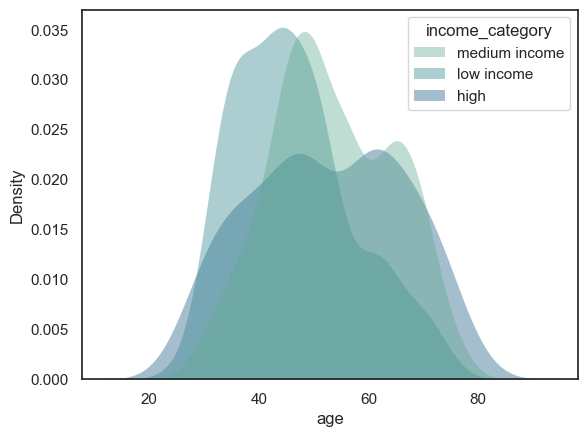

In [7105]:
sn.kdeplot(
   data=df, x='age', hue="income_category",
   fill=True, common_norm=False, palette="crest",
   alpha=.4, linewidth=0,
)
plt.show()

In [7106]:

def age_category(row):
    if row['age'] <= 30:
        return 'young'
    elif (row['age'] <= 45) and (row['income'] > 30):
        return 'adult'   
    elif (row['age'] <= 65) and (row['income'] > 45):
       return 'mature'
    else:
        return 'senior'


df['age_category'] = df.apply(age_category, axis=1)  



In [7107]:
fig = go.Figure()
fig.add_trace(go.Box(x=df['total_cat_spent'], name='partner', boxpoints='all'))
fig.add_trace(go.Box(x=df['total_cat_spent'], name='alone', boxpoints='all'))
fig.update_layout(title="Compare family ststus vs. total spent",
                  yaxis_title="Family Status",
                  xaxis_title="total_cat_spent")
fig.show()

In [7108]:
fig = px.scatter(df, x="age", y="total_cat_spent", color="living_with_status",
                 color_discrete_sequence=px.colors.qualitative.Antique)

fig.update_layout(
    title="<b>Relationship between Age, total spent and family status",
    xaxis_title="Age",
    yaxis_title="Total_cat_spent",
)

fig.show()

Summary:


50,4% of our customers are Graduate and 38,2% are Post Graduate
64,5% of our customers are in relationship, 71,5% have at least 1 children. The highest Birth rate of customers is 81
Minimum Income of customer is 1 730, Maximum(after cleaning) - 162 397, Mean Income - 51 952
Minimum Expenses of customer is 5.0, Maximum(after cleaning) - 2 525, Mean Expenses - 605,99
79.33% of the customers who accepted the offer in the campaign is 0

Hipotises which I've checked:
Do single clients spend more than those living with a partner? Based on the graph below, we can see that we don't have much of a difference, but single customers spend more on average.

Does the amount of expenses depend on the level of education of clients? Answer: yes, we can observe this dependence. People with college and postgraduate degrees spent more than undergraduate customers.

Do customers spend more if they have children or more than 1 child? We see that no, the client without children spent more than the client with children. But it’s also worth paying attention to the sample; in our data, the proportion of consumers without children is 28,5%

Do campaing influent to the customer in they spents? As we can observe yes its important but in general if we look at qty campains vs. partisipation in our dataset we can noiteced that 73% dont participate in campaing



